# Introduction to AI
## Text and Speech Demos
Talk with your group about what you think each line of code does.

# Part 1 - Performing Basic Frequency Analysis
Let's start by using some very basic frequency analysis on a document to see if we can determine what the document is about  based on word frequency.

### Load a Text Document
Run the cell below to load the transcript of a Shark Tank pitch.

In [2]:
# Open a Shark Tank pitch by Pick-up Pools
doc1 = open("SharkTank.txt", "r")

# Read the document and print its contents
doc1Txt = doc1.read()
print(doc1Txt)

Hi sharks, my name is Tommy Prestella and I'm an Air Force pilot from San Dimas, California. I'm here today seeking one hundred thousand dollars for twenty five percent of my company. Now sharks, I love summer days as much as the next guy. What's not to love, right? I mean backyard barbeques, evening baseball games...I love it all. But sharks, there's one thing about Summer that I just really don't like. It's freakin' hot! And if you've been stationed in the deep south like I have for the past twelve years, or deployed overseas to Iraq, Afghanistan, or Africa, you know that those places get crazy hot! I got sick and tired of sweating through my clothes everytime I stepped outside and just always being uncomfortable. So I fused together a creative way to stay cool and beat the summer heat. Sharks, you guys ready to cool off? Introducing the one and only Pick-up Pools. Sharks, as you can see the Pick-up Pool is the ultimate truck bed swimming pool. This patented pool liner instantly tran

#### Normalize the Text

Text includes a lot of punctuation, which we need to remove if we want to work only with the actual words.

Run the cell below to strip all the punctuation from the text and convert the words to lower case.

In [3]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in doc1Txt if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print (txt)

hi sharks my name is tommy prestella and im an air force pilot from san dimas california im here today seeking one hundred thousand dollars for twenty five percent of my company now sharks i love summer days as much as the next guy whats not to love right i mean backyard barbeques evening baseball gamesi love it all but sharks theres one thing about summer that i just really dont like its freakin hot and if youve been stationed in the deep south like i have for the past twelve years or deployed overseas to iraq afghanistan or africa you know that those places get crazy hot i got sick and tired of sweating through my clothes everytime i stepped outside and just always being uncomfortable so i fused together a creative way to stay cool and beat the summer heat sharks you guys ready to cool off introducing the one and only pickup pools sharks as you can see the pickup pool is the ultimate truck bed swimming pool this patented pool liner instantly transforms the bed of your pickup truck in

#### Get the Frequency Distribution
Now let's tokenize the text (split it into individual words), and count the number of times each word occurs.

In [4]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
print (count_frame)

        Count
hi          1
sharks      6
my          3
name        1
is          3
...       ...
go          1
swim        1
make        1
deal        1
with        1

[163 rows x 1 columns]


[nltk_data] Downloading package punkt to /Users/catherine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Visualize Word Frequency
It's often easier to analyze frequency by creating a visualization, such as a Pareto chart.

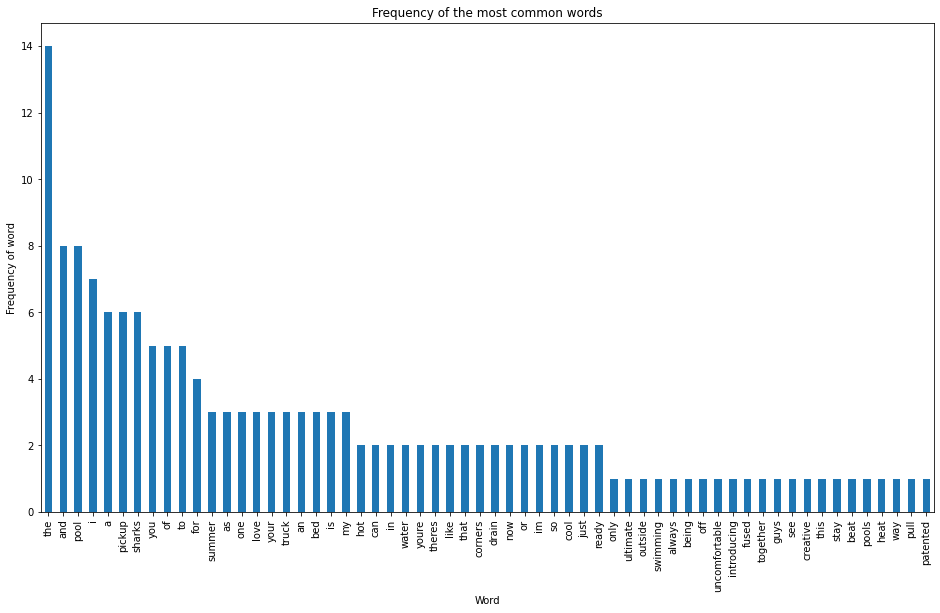

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sort the data frame by frequency
counts = count_frame.sort_values('Count', ascending = False)

# Display the top 60 words as a bar plot
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Remove Stop Words and Visualize Frequency Distribution for the Remaining Words

A large number of the words in the text are common words like "the" or "and". These "stopwords" add little in the way of semantic meaning to the text, and won't help us determine the subject matter - so run the cell below to remove them. Now that we've prepared the text, we can tokenize the string into a list of individual words, and then perform frequency analysis on those words based on how often they appear in the text.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catherine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


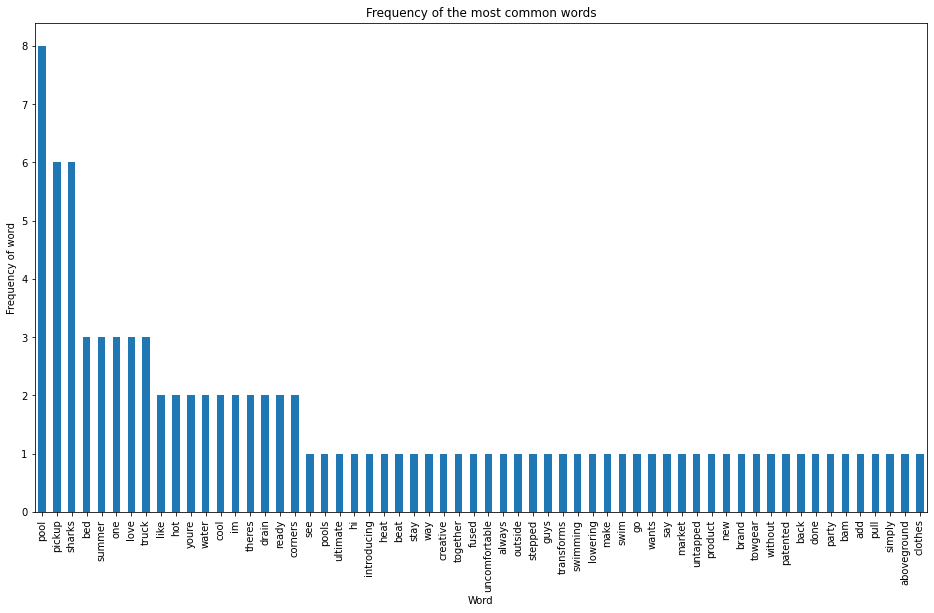

In [6]:
# Get standard stop words from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

# Filter out the stop words
txt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])

# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [7]:
# remind ourselves of the first document
print("------------------------------------------------")
print("Shark Tank Pick-up Pools Pitch")
print("------------------------------------------------")
print(doc1Txt)

# Load the movie script of the opening scene for Spider-Man: Into the Spider-Verse
doc2 = open("Spiderman.txt", "r")
doc2Txt = doc2.read()
print("------------------------------------------------")
print("Spider-Man: Into the Spider-Verse")
print("------------------------------------------------")
print (doc2Txt)
from string import punctuation
txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])


# Load the play-by-play transcript of the Dallas Mavericks' Luka Doncic hitting a three pointer at the buzzer to win Game 4 of the NBA Playoffs against the Clippers
print("------------------------------------------------")
print("NBA Playoffs Luka Doncic Game Winner - Play by Play")
print("------------------------------------------------")
doc3 = open("PlayByPlay.txt", "r")
doc3Txt = doc3.read()
print (doc3Txt)
from string import punctuation
txt3 = ''.join(c for c in doc3Txt if not c.isdigit())
txt3 = ''.join(c for c in txt3 if c not in punctuation).lower()
txt3 = ' '.join([word for word in txt3.split() if word not in (stopwords.words('english'))])


------------------------------------------------
Shark Tank Pick-up Pools Pitch
------------------------------------------------
Hi sharks, my name is Tommy Prestella and I'm an Air Force pilot from San Dimas, California. I'm here today seeking one hundred thousand dollars for twenty five percent of my company. Now sharks, I love summer days as much as the next guy. What's not to love, right? I mean backyard barbeques, evening baseball games...I love it all. But sharks, there's one thing about Summer that I just really don't like. It's freakin' hot! And if you've been stationed in the deep south like I have for the past twelve years, or deployed overseas to Iraq, Afghanistan, or Africa, you know that those places get crazy hot! I got sick and tired of sweating through my clothes everytime I stepped outside and just always being uncomfortable. So I fused together a creative way to stay cool and beat the summer heat. Sharks, you guys ready to cool off? Introducing the one and only Pick-u

# Part 2 - Dig Deeper - TF-IDF
#### Get TF-IDF Values for the top three words in each document

In the previous example, we've used basic term frequency to determine each word's "importance" based on how often it appears in the document. When dealing with a large corpus of multiple documents, a more commonly used technique is *term frequency, inverse document frequency* (or TF-IDF) in which a score is calculated based on how often a word or term appears in one document compared to its more general frequency across the entire collection of documents. Using this technique, a high degree of relevance is assumed for words that appear frequently in a particular document, but relatively infrequently across a wide range of other documents. If this is confusing, don't worry! Run the examples below and it will become more clear.

In [ ]:
# install textblob library and define functions for TF-IDF
!pip install -U textblob==0.10.0
import math
from textblob import TextBlob as tb

def tf(word, doc):
    return doc.words.count(word) / len(doc.words)

def contains(word, docs):
    return sum(1 for doc in docs if word in doc.words)

def idf(word, docs):
    return math.log(len(docs) / (1 + contains(word, docs)))

def tfidf(word, doc, docs):
    return tf(word,doc) * idf(word, docs)


# Create a collection of documents as textblobs
doc1 = tb(txt)
doc2 = tb(txt2)
doc3 = tb(txt3)
docs = [doc1, doc2, doc3]

# Use TF-IDF to get the three most important words from each document
print('-----------------------------------------------------------')
for i, doc in enumerate(docs):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))


### Stemming

#### View frequency of unstemmed words from Lewis Capaldi's song

In [ ]:
# Load and print the lyrics to the song "Someone You Loved" by Lewis Capaldi
doc4 = open("SomeoneYouLoved.txt", "r")
doc4Txt = doc4.read()

print("------------------------------------------------")
print("Lyrics to 'Someone You Loved' by Lewis Capaldi")
print("------------------------------------------------")
print(doc4Txt)

# Normalize and remove stop words
from string import punctuation
doc4Txt = ''.join(c for c in doc4Txt if not c.isdigit())
doc4Txt = ''.join(c for c in doc4Txt if c not in punctuation).lower()
doc4Txt = ' '.join([word for word in doc4Txt.split() if word not in (stopwords.words('english'))])

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(doc4Txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

#### Stem the words using the Porter stemmer

In [ ]:
from nltk.stem.porter import PorterStemmer

# Get the word stems
ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Part 3 - Named Entity Extraction using Spacy

Named-entity recognition (NER) (also known as (named) entity identification, entity chunking, and entity extraction) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc. (Ref: Wikipedia)

In this exercise we'll use a state-of-the-art text processing and NLP library called Spacy. You can tinker around with the text inputs, although you'll find that it works better on sentences where there are specific organizations, locations, names, etc. 

In [ ]:
# Install these in binder 

! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm

In [ ]:
import spacy
from spacy import displacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
text1 = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously."

doc1 = nlp(text1)
displacy.render(doc1, style="ent", jupyter=True)

In [ ]:
text2 = "Ben Solo was a human male Force-sensitive who fell to the dark side of the Force as Kylo Ren, master of the Knights of Ren and eventual Supreme Leader of the First Order, but returned to the light side shortly before his death. "

doc2 = nlp(text2)
displacy.render(doc2, style="ent", jupyter=True)

In [ ]:
text3 = "Hwang had conceived of the idea based on his own economic struggles early in life as well as the class disparity in South Korea and capitalism."

doc3 = nlp(text3)
displacy.render(doc3, style="ent", jupyter=True)

# Part 4 Create a  Speech Service
The Microsoft Cognitive Services include the Bing Speech service, that can interpret spoken input from a microphone or audio file. Follow these steps to provision the Bing speech service:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ Create a resource**, and search for "**Speech**".
4. In the list of services, click ** Speech**.
5. In the **Bing Speech** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Azure for Students or Microsoft Azure Sponsorship
  * **Location**: **<u><font color=#ff0000>(US) South Central US</font></u>** **(If you do not select this location your code WILL NOT WORK!)**
  * **Pricing tier**: Choose the Free F0 or Standard S0 pricing tier.
  * **Resource Group**: Choose the existing resource group you used previously.
7. Wait for the service to be created.
8. When deployment is complete, click **Go to resource**.
10. In the blade for your Speech service, click **Keys and Endpoint** and then copy **Key 1** to the clipboard and paste it into the **speechKey** variable assignment value in the cell below. 
11. Click the Run button to run the cell below that assigns the variable speechKey.

In [ ]:
speechKey = 'YOUR_KEY_1'

#### Get the audio input
We'll use a WAV file of captured audio containing the speech we want to transcribe

In [ ]:
import IPython

try:
    speechKey
except:
    print("Make sure you run the code cell above that assigns the speechKey variable! Then run this cell again.")
    
IPython.display.Audio('RainSpain.wav', autoplay=True)

#### Convert speech to text

In [ ]:
import IPython
import requests, json

speech_region = "SouthCentralUS"

with open("RainSpain.wav", mode="rb") as audio_file:
        audio_data =  audio_file.read()
        
# The Speech API requires an access token (valid for 10 mins)
apiEndPoint = "https://" + speech_region + ".api.cognitive.microsoft.com/sts/v1.0/issueToken"
apiKey = speechKey
headers = {"Ocp-Apim-Subscription-Key": apiKey}

# Use the API key to request an access token
response = requests.post(apiEndPoint, headers=headers)
accesstoken = str(response.text)

# Now that we have a token, we can set up the request
speechToTextEndPoint = "https://" + speech_region + ".stt.speech.microsoft.com/speech/recognition/conversation/cognitiveservices/v1"
headers = {"Content-type": "audio/wav; codec=audio/pcm; samplerate=16000", 
           "Authorization": "Bearer " + accesstoken}
params = {"language":"en-US"}
body = audio_data

# Connect to server, post the request, and get the result
response = requests.post(speechToTextEndPoint,data=body, params=params, headers=headers)
result = str(response.text)
print(json.loads(result)['DisplayText'])

# Part 5 - NLP Algorithms using Google Colaboratory 

In these next exercises, you can use Google Colaboratory Notebooks online. Each Google Colaboratory ("Colab") notebook is its own virtual environment which can be run effortlessly in your browser. What you will do is click the link for `Open Google Colab Notebook` which will take you to the notebook located outside of Binder, somewhere on the internet. No installation on your computer is required. 

Each Google Colab notebook has been authored by different people over the years, and as such, are custom. We tried to select notebooks where the code is minimal and/or the explanations can be easily read. Don't get discouraged if some of the code and content is too complicated. Simply click each cell and wait for it to run. Be patient and don't click ahead.

## Tips: 
You may come across these messages. Here are the ways you can solve them.

**Run anyway**. You will see a pop-up that reads `Warning: This notebook was not authored by Google`. Click `Run anyway`.

<img src=./img/runanyway.png>

**Change your runtime to GPU**. Google Colab offers free use of Tesla K80 GPUs. Go to the toolbar and select `Runtime` -> `Change Runtime Type`. Select `GPU` in the drop-down under `Hardware accelerator`.

<img src=./img/gpu.png>

**Too many sessions**. This means you have too many Google Colab notebooks running at the same time. Due to restricted, free, compute, you should only run one notebook (session at a time. 

<img src=./img/sessions.png>

Click `Manage Sessions`. You can see in your Active Sessions all the notebooks you are simultaneously running. Click `TERMINATE` for all of them. Now `Close` and it returns you to your notebook. Click the last cell you left off at.

<img src=./img/terminate.png>

## Binary Text Classification for Sentiment Prediction

A classic example of text classification is to use the IMDB Movie Review dataset which consists of 25,000 examples in the training set. You'll get to train a sequence2sequence model for 10 epochs. You'll also get to see some of the preprocessing you completed above in action used in the notebook like vectorization. Your model should be close to 87% accurate for sentiment prediction. There's alot of extra content in the cells. Feel free to read each if you like, since some of the cells include evaluating the model for accurate it is and visualizing the accuracy and loss per epoch you trained.

<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/text_classification.ipynb#scrollTo=QW355HH5L49K">Open Google Colab Notebok</a>

An example of the data is this review: 

> "Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived."

After training the model, you'll be able to enter some test sentences. The predicted outputs will be probabilities of how positive they are, such as 61.4% positive, 43.6% positive, or 35.3% positive.

<img src=./img/predictions.png>



# Nice work!

In this lab, you saw how to use many different Azure tools to process text and speech. There are so many applications you can create by combining these different tools. Brainstorm a few ideas you could build for the final project!

---

# Optional Post Camp Notebooks (Move on to the Final Project NOW!) 

### Text-to-Speech Transformer Model (Optional)
This notebook conducts audio synthesis based on text input, using two types of algorithms: a Forward Transformer TTS and a WaveRNN Vocoder. Transformers are a special type of algorithm that are used for state-of-the-art NLP tasks today. This notebook loads pre-trained models that have been trained on extrenmely large datasets of language. Installing packages may take between 2 - 5 minutes to complete. After installation, all cells should run quickly. 

<a href="https://colab.research.google.com/github/as-ideas/TransformerTTS/blob/master/notebooks/synthesize_forward_wavernn.ipynb#scrollTo=zdMgfG7GMF_R"> Open Google Colab Notebook </a>

Under `Synthesize text`, try entering your own custom sentence: 
`sentence = 'Scientists at the CERN laboratory, say they have discovered a new particle.'`

### Question and Answering in Multiple Languages using BERT (Optional)
BERT is a state-of-the-art language model. This notebook uses a pre-trained BERT model fine-tuned on multilingual Question and Answer data (Spanish, Russian, German, Hindi, Chinese). 

In each cell you will find the `context` of the question that is about to be asked. The `question` based on the `context` is then presented to the model. The BERT model then answers the question. In the last cell, you can create your own `context` and `question`. For example, my `context` was: "The working hours of a normal person is 9 to 5" / `question`: What are normal working hours? 

Try it out with another student in your class who might speak one of these languages. Ask them to enter a `context` and `question`.

<a href="https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Try_mrm8488_xquad_finetuned_model.ipynb#scrollTo=WGA6yPiFe-JW">Open Google Colab Notebook</a>

### DialoGPT Chatbot (Optional) 

A transformer language model that was trained on 147M Reddit comment chains. You can create a chat bot in just 10 lines of code. 

<img src=./img/dialogpt.png>

<a href="https://colab.research.google.com/drive/1uib2-bxqYKR3lRdEmOh_MaWBGrMrPOUL#scrollTo=tDYhaGQJdJDr">Open Google Colab Notebook</a>

### Sentiment Analysis in Spanish (Optional)

<a href="https://colab.research.google.com/drive/1ItS0-ZPXGcEeVmRmHaneX3w8eq6Vhdde?usp=sharing&fbclid=IwAR0z7XXLyy3KCJva9d-7zIXEYAZ8GK-9kXz4_hd_U_gfnu6-SoizgexOpXE#scrollTo=i7V1mxieDHII"> Open Google Colab Notebook</a>

### AI Generated Art using VQGAN + CLIP (Optional) 

**Note - this notebook takes a very long time to run since it is training a generative model.** It can take 25 minutes to generate images for 400 training iterations. 

Example Prompt: **"sunny skies with girls on roller skates"**

<img src=./img/sunnygirl.png>

A very user-friendly notebook that is self-explanatory and fun. Enter a prompt encoded by the CLIP algorithm and generate an image through VQGAN. Note, the setup and installation of libraries will take up to 5 minutes. Be patient!

<a href="https://colab.research.google.com/drive/1n_xrgKDlGQcCF6O-eL3NOd_x4NSqAUjK#scrollTo=wSfISAhyPmyp">Open Google Colab Notebook</a>